# Introduction to Machine Learning

This lab introduces some basic concepts of machine learning with R. In this lab you will use the K-Nearest Neighbor (KNN) algorithm to classify the species of iris flowers, given measurements of flower characteristics. By completing this lab you will have an overview of an end-to-end machine learning modeling process.  

By the completion of this lab, you will:
1. Follow and understand a complete end-to-end machine learning process including data exploration, data preparation, modeling, and model evaluation. 
2. Develop a basic understanding of the principles of machine learning and associated terminology. 
3. Understand the basic process for evaluating machine learning models. 

## Overview of KNN classification

Before discussing a specific algorithm, it helps to know a bit of machine learning terminology. In supervised machine learning a set of ***cases*** are used to ***train***, ***test*** and ***evaluate*** the model. Each case is comprised of the values of one or more ***features*** and a ***label*** value. The features are variables used by the model to ***predict** the value of the label. Minimizing the ***errors*** between the true value of the label and the prediction supervises the training of this model. Once the model is trained and tested, it can be evaluated based on the accuracy in predicting the label of a new set of cases. 

In this lab you will use randomly selected cases to first train and then evaluate a k-nearest-neighbor (KNN) machine learning model. The goal is to predict the type or class of the label, which makes the machine learning model a ***classification*** model. 

The k-nearest-neighbor algorithm is conceptually simple. In fact, there is no formal training step. Given a known set of cases, a new case is classified by majority vote of the K (where $k = 1, 2, 3$, etc.) points nearest to the values of the new case; that is, the nearest neighbors of the new case. 

The schematic figure below illustrates the basic concepts of a KNN classifier. In this case there are two features, the values of one shown on the horizontal axis and the values of the other shown on the vertical axis. The cases are shown on the diagram as one of two classes, red triangles and blue circles. To summarize, each case has a value for the two features, and a class. The goal of thee KNN algorithm is to classify cases with unknown labels. 

Continuing with the example, on the left side of the diagram the $K = 1$ case is illustrated. The nearest neighbor is a red triangle. Therefore, this KNN algorithm will classify the unknown case, '?', as a red triangle. On the right side of the diagram, the $K = 3$ case is illustrated. There are three near neighbors within the circle. The majority of nearest neighbors for $K = 3$ are the blue circles, so the algorithm classifies the unknown case, '?', as a blue circle. Notice that class predicted for the unknown case changes as K changes. This behavior is inherent in the KNN method.  

![](img/KNN.jpg)
<center> **KNN for k = 1 and k = 3**</center>

There are some additional considerations in creating a robust KNN algorithm. These will be addressed later in this course. 

## Examine the data set

In this lab you will work with the Iris data set. This data set is famous in the history of statistics. The first publication using these data in statistics by the pioneering statistician Ronald A Fisher was in his 1936. Fisher proposed an algorithm to classify the species of iris flowers from physical measurements of their characteristics. The data set has been used as a teaching example ever since. 

Now, you will load and examine these data. Execute the code in the cell below and examine the first few rows of the data frame. 

In [1]:
data(iris) # Load the iris data set
head(iris) # look at the first few rows of the data frame

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


There are four features, containing the dimensions of parts of the iris flower structures. The label column is the Species of the flower. The goal is to create and test a KNN algorithm to correctly classify the species. 

Next, you will execute the code in the cell below to show the data types of each column. 

In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


The features are all numeric, and the label is of categorical or Factor type.

Next, you will determine the number of unique categories, and number of cases for each category, for the label variable, Species. Execute the code in the cell below and examine the results. 

In [3]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

You can see there are three species of iris, each with 50 cases. 

Next, you will create some plots to see how the classes might, or might not, be well separated by the value of the features. In an idea case, the label classes will be perfectly separated by one or more of the feature pairs. In the real-world this ideal situation will rarely, if ever, be the case.
 
There are six possible pair-wise scatter plots of these four features. For now, we will just create scatter plots of two variable pairs. Execute the code in the cell below and examine the resulting plots.
***
**Note:** Data visualization and the ggplot2 package are covered in another lesson.
***

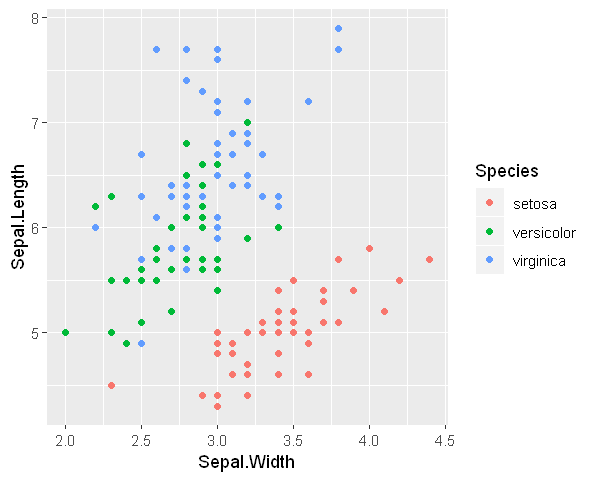

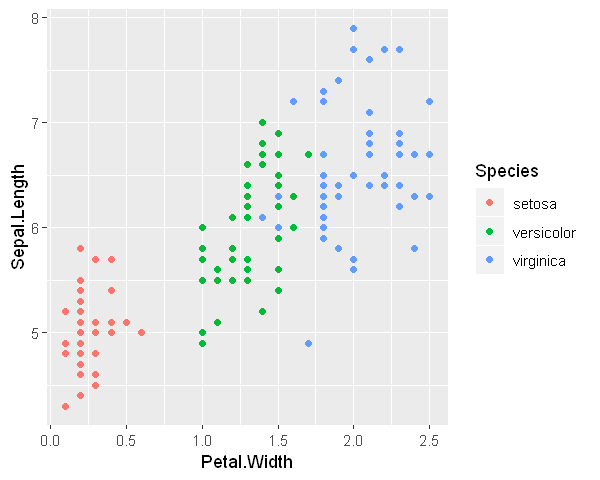

In [4]:
library(ggplot2)
library(repr)
options(repr.plot.width=5, repr.plot.height=4) # Set the initial plot area dimensions

ggplot(iris, aes(Sepal.Width, Sepal.Length)) + geom_point(aes(color = Species))
ggplot(iris, aes(Petal.Width, Sepal.Length)) + geom_point(aes(color = Species))                                                                                                                   

Examine these results noticing the separation, or overlap, of the label values.

Then, answer **Question 1** on the course page.

## Prepare the data set

Data preparation is an important step before training any machine learning model. These data require only two preparation steps:
- Scale the numeric values of the features. It is important that numeric features used to train machine learning models have a similar range of values. Otherwise, features which happen to have large numeric values may dominate model training, even if other features with smaller numeric values are more informative. In this case Zscore normalization is used. This normalization process scales each feature so that the mean is 0 and the variance is 1.0. 
- Split the dataset into randomly sampled training and evaluation data sets. The random selection of cases seeks to limit the leakage of information between the training and evaluation cases.

The code in the cell below iterates over the numeric feature columns of the data frame. A statistical summary of the data frame is then printed. Execute this code and examine the results. 

In [5]:
iris[,c('Sepal.Width', 'Sepal.Length', 'Petal.Width', 'Petal.Length')] = 
    lapply(iris[,c('Sepal.Width', 'Sepal.Length', 'Petal.Width', 'Petal.Length')], scale)
print(summary(iris))
print(sapply(iris[,c('Sepal.Width', 'Sepal.Length', 'Petal.Width', 'Petal.Length')], sd))

   Sepal.Length.V1       Sepal.Width.V1      Petal.Length.V1   
 Min.   :-1.8637803   Min.   :-2.4258204   Min.   :-1.5623422  
 1st Qu.:-0.8976739   1st Qu.:-0.5903951   1st Qu.:-1.2224563  
 Median :-0.0523308   Median :-0.1315388   Median : 0.3353541  
 Mean   : 0.0000000   Mean   : 0.0000000   Mean   : 0.0000000  
 3rd Qu.: 0.6722490   3rd Qu.: 0.5567457   3rd Qu.: 0.7602115  
 Max.   : 2.4836986   Max.   : 3.0804554   Max.   : 1.7798692  
    Petal.Width.V1          Species  
 Min.   :-1.4422448   setosa    :50  
 1st Qu.:-1.1798595   versicolor:50  
 Median : 0.1320673   virginica :50  
 Mean   : 0.0000000                  
 3rd Qu.: 0.7880307                  
 Max.   : 1.7063794                  
 Sepal.Width Sepal.Length  Petal.Width Petal.Length 
           1            1            1            1 


Examine these results. The mean is zero and the variance approximately 1.0.

Now, you will split the dataset into a test and evaluation sub-sets. The code in the cell below randomly samples the cases and places them in either the training or test data frame. Execute this code to create these subsets. 

***
**Note:** The use of the dplyr package and other packages in the Tidyverse for data preparation is covered in other labs and courses.
***

In [6]:
## Split the data into a training and test set by Bernoulli sampling
library(dplyr)
set.seed(2345)
train.iris = sample_frac(iris, 0.7)
test.iris = iris[-as.numeric(rownames(train.iris)),] # use as.numeric because rownames() returns character

Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Train and evaluate the KNN model

With some understanding of the relationships between the features and the label and preparation of the data completed you will now train and evaluate a $K = 3$ model. The code in the cell below does the following:
- Defines the model in the R modeling language as $Species \sim\ .$. In English this formula means model the label Species by all of the other columns (features) in the data frame, indicated by $.$. 
- Sets the training data set to the subset created above. 
- Sets the test data set to the subset created above. The performance of the model is evaluated on thee prediction accuracy on the labels of this subset.
- The the value of K at 3.
- Prints the summary of the model. 

Execute this code and examine the summary of these results.


***
**Note:** Additional information on defining models with the R modeling language is in another lesson.
***

In [8]:
## Compute a k = 3 nearest neighbor model
library(kknn)
knn.3 <- kknn(Species ~ ., train = train.iris, test = test.iris, k=3)
summary(knn.3)

Warning message:
"package 'kknn' was built under R version 3.6.1"


Call:
kknn(formula = Species ~ ., train = train.iris, test = test.iris,     k = 3)

Response: "nominal"
          fit prob.setosa prob.versicolor prob.virginica
1   virginica           0      0.00000000      1.0000000
2   virginica           0      0.38490018      0.6150998
3   virginica           0      0.00000000      1.0000000
4   virginica           0      0.08866211      0.9113379
5   virginica           0      0.00000000      1.0000000
6   virginica           0      0.00000000      1.0000000
7   virginica           0      0.00000000      1.0000000
8   virginica           0      0.00000000      1.0000000
9   virginica           0      0.00000000      1.0000000
10  virginica           0      0.00000000      1.0000000
11  virginica           0      0.00000000      1.0000000
12  virginica           0      0.00000000      1.0000000
13  virginica           0      0.00000000      1.0000000
14  virginica           0      0.00000000      1.0000000
15 versicolor           0      1.0000000

Examine the summary of the model and notice the following:
- A summary of the model is displayed. 
- The classification results for the test data are displayed. You can see the most probable class along with the probabilities of the prediction for each class. The most probable class is the prediction. 

Next, execute the code in the cell below to compute the accuracy of the model. Accuracy is the percentage of the test cases correctly classified. Execute this code, examine the results, and answer **Question 2** on the course page.

In [9]:
test.iris$predicted = predict(knn.3)
test.iris$correct = test.iris$Species == test.iris$predicted
round(100 * sum(test.iris$correct) / nrow(test.iris))

[1] 96

Now, execute the code in the cell below and examine plots of the classifications of the iris species.

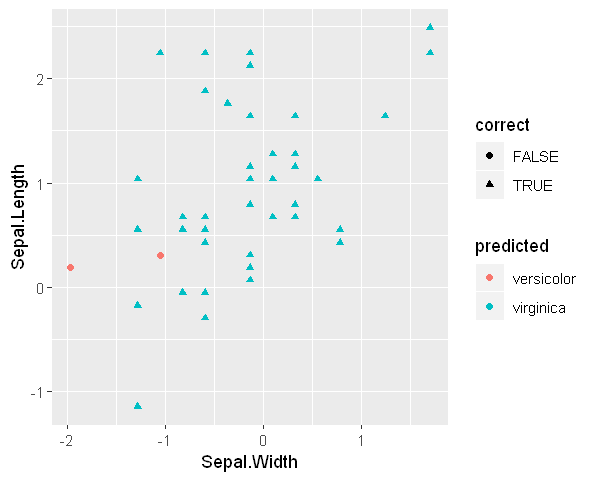

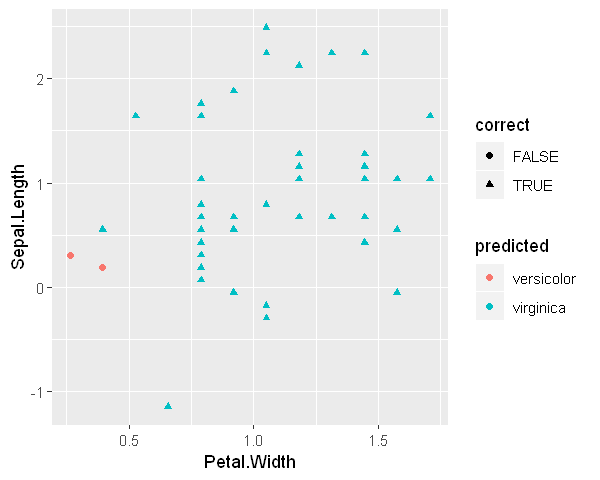

In [10]:
ggplot(test.iris, aes(Sepal.Width, Sepal.Length)) + geom_point(aes(color = predicted, shape = correct))
ggplot(test.iris, aes(Petal.Width, Sepal.Length)) + geom_point(aes(color = predicted, shape = correct))                                                              

In the plots above color is used to show the predicted class. Correctly classified cases are shown by triangles and incorrectly classified cases are shown by circles. 

Examine the plot and answer **Question 3** on the course page

## Summary

In this lab you have created and evaluated a KNN machine learning classification model. Specifically you have:
1. Loaded and explored the data using visualization to determine if the features separate the classes.
2. Prepared the data by normalizing the numeric features and randomly sampling into training and testing subsets. 
3. Constructing and evaluating the machine learning model. Evaluation was performed by statistically, with the accuracy metric, and with visualization. 